In [ ]:
# Estudo de Caso: Análise de Negócio de um E-Commerce
import numpy as np
import scipy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import io

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving tabela_dados.csv to tabela_dados.csv


In [ ]:
# Verificação geral dos dados de todas as colunas.
tabela_dados = pd.read_csv(io.BytesIO(uploaded['tabela_dados.csv'])) 
df=tabela_dados
tabela_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94892 entries, 0 to 94891
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 94892 non-null  int64  
 1   fullvisitorid              94892 non-null  uint64 
 2   date                       94892 non-null  object 
 3   channelgrouping            94892 non-null  object 
 4   sessions                   94892 non-null  int64  
 5   hits_today                 94892 non-null  int64  
 6   pageviews_today            94892 non-null  int64  
 7   timeonsite_today           94892 non-null  int64  
 8   bounces_today              94892 non-null  int64  
 9   newvisits_today            94892 non-null  int64  
 10  campaign_today             94892 non-null  object 
 11  medium_today               94892 non-null  object 
 12  keyword_today              47780 non-null  object 
 13  adcontent_today            2057 non-null   obj

In [ ]:
# Questões a serem respondidas ao Gerente da Área de Marketing da Empresa:
# 1. De que maneira (busca orgânica, por meio de anúncios, por redes sociais, etc.) os clientes acessam mais o portal para realizarem as suas compras? 
# 2. De que canais os clientes estão mais aceesando o portal (google, portal do E-commerce, redes sociais, etc.) para realizarem suas compras?
# 3. Qual o dispositivo (laptop, celeular ou tablet) é mais usado pelo cliente para acessar o portal?
# 4. Por quanto tempo (em média) um visitante permanece no portal, por dia do mês?
# 5. Qual a principal fonte de acesso ao portal para se efetuar uma compra?
# 6. Qual a média de faturamento por dia e mês?
# 7. Quais os países que mais realizam compras no portal do E-Commerce?

In [ ]:
# Respondendo as questões.

In [ ]:
# Q1. De que maneira (busca orgânica, meio de anúncios, por redes sociais, etc.) os clientes acessam mais o portal para realizarem as suas compras? 

In [ ]:
x1=tabela_dados['channelgrouping'].value_counts().index
sum1=tabela_dados['channelgrouping'].count()
y11=tabela_dados['channelgrouping'].value_counts()
percent1=round(tabela_dados['channelgrouping'].value_counts()/tabela_dados['channelgrouping'].count()*100,0)
y1=percent1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


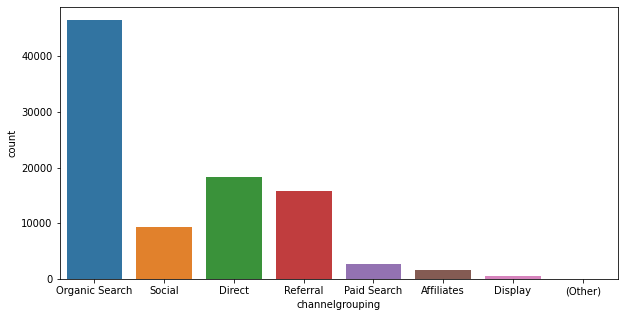

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(tabela_dados['channelgrouping'])
plt.show()

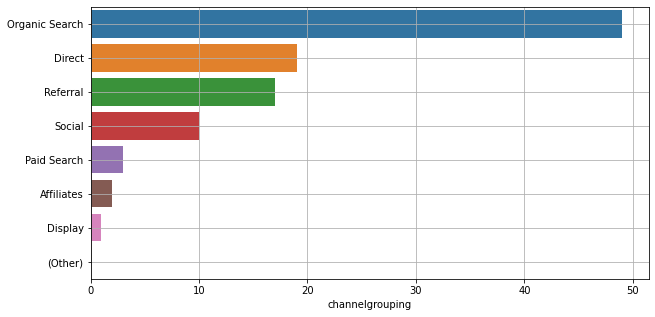

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = y1, y = x1)
plt.grid()
plt.show()

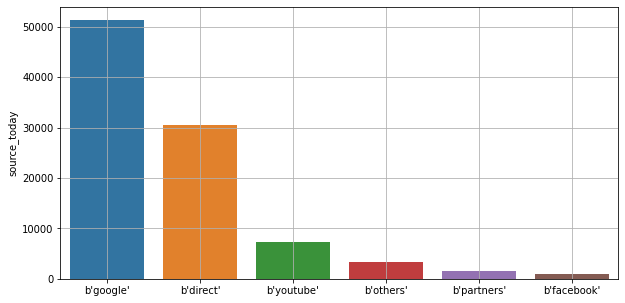

In [ ]:
# Q2. De que canais os clientes estão mais acessando o portal (google, portal do E-commerce, redes sociais, etc.) para realizarem suas compras?
x2=tabela_dados['source_today'].value_counts().index
y2=tabela_dados['source_today'].value_counts()
plt.figure(figsize = (10,5))
ax = sns.barplot(x = x2, y = y2)
plt.grid()
plt.show()

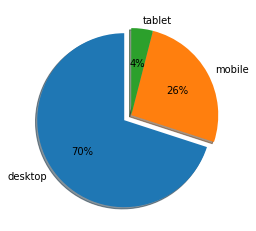

In [ ]:
# Q3. Qual o dispositivo (laptop, celeular ou tablet) é mais usado pelo cliente para acessar o portal?
x3=tabela_dados['devicecategory'].value_counts().index
y3=round(tabela_dados['devicecategory'].value_counts()/tabela_dados['devicecategory'].count()*100,0)
labels = x3
sizes = y3
explode = (0.1,0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.show()


75


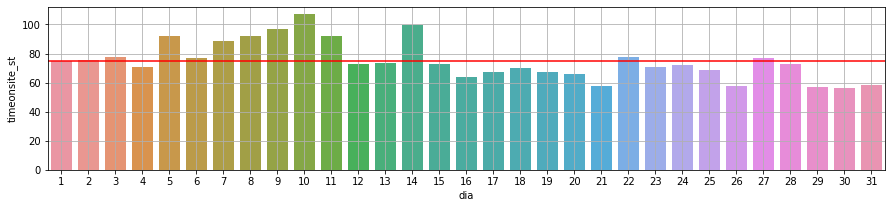

In [ ]:
# Q4. Por quanto tempo (em média) um visitante permanece (realizando pesquisas) no portal por dia do mês?
# manipulando as datas com a função datetime
df['date']=pd.to_datetime(df['date'])
df['dia'] = df['date'].dt.day
x4=df['dia']
y4=df.groupby(x4).agg({'timeonsite_st':'mean'}).reset_index()
x41=y4.loc[:,'dia']
x42=y4.loc[:,'timeonsite_st']
x43=y4['timeonsite_st'].mean()
print(round(x43,))
plt.figure(figsize = (15,3))
sns.barplot(x=x41, y=x42)
plt.axhline(y=x43, xmin=0, xmax=30,color='r')
plt.grid()
plt.show()

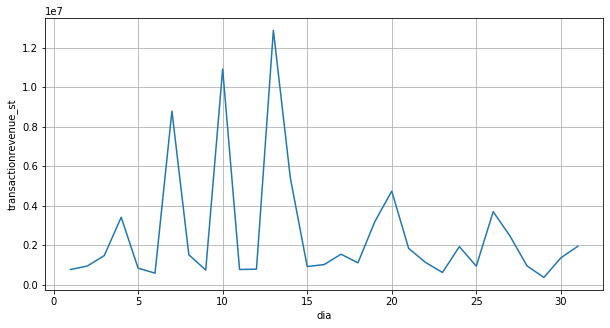

In [ ]:
# Q5. Quais os dias que os clientes mais visitam o portal e qual o dia de maior faturamento?
df['date']=pd.to_datetime(df['date'])
df['dia'] = df['date'].dt.day
x5=df['dia']
y5=df.groupby(x5).agg({'transactionrevenue_st':'mean'}).reset_index()
x51=y5.loc[:,'dia']
x52=y5.loc[:,'transactionrevenue_st']
x53=y5['transactionrevenue_st'].mean()
plt.figure(figsize = (10,5))
sns.lineplot(x=x51, y=x52)
plt.grid()
plt.show()

In [ ]:
# Selecionando os dias que os clientes mais realizam compras no portal E-Commerce
x55=y5.sort_values('transactionrevenue_st',ascending=False).nlargest(3,'transactionrevenue_st')
print(x55)

    dia  transactionrevenue_st
12   13           1.288000e+07
9    10           1.092085e+07
6     7           8.792452e+06


4586


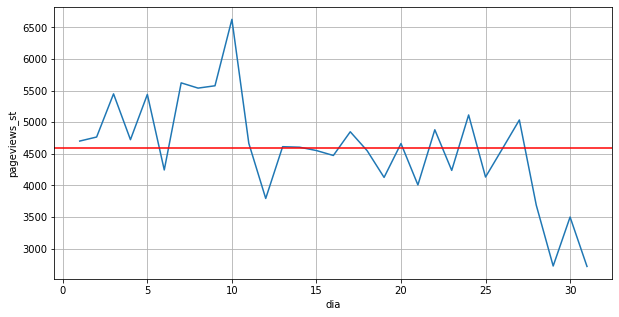

In [ ]:
#Q6. Quantas visitas, em média, são realizadas pelos clientes ao portal do E-commerce, por dia, ou seja qual o valor médio de pageviews/dia?
df['date']=pd.to_datetime(df['date'])
df['dia'] = df['date'].dt.day
x6=df['dia']
y6=df.groupby(x6).agg({'pageviews_st':'sum'}).reset_index()
x61=y6.loc[:,'dia']
x62=y6.loc[:,'pageviews_st']
x63=y6['pageviews_st'].mean()
print(round(x63,))
plt.figure(figsize = (10,5))
sns.lineplot(x=x61, y=x62)
plt.axhline(y=x63, xmin=0, xmax=30,color='r')
plt.grid()
plt.show()

In [ ]:
# Q7. Quais países realizam mais compras no portal do E-Commerce?
# Fazer o ranking de Transações por paises?
y7=round(df.groupby(['country'])['transactionrevenue_st'].sum().sort_values(ascending=False).nlargest(5)/244135040000*100,1)
display(y7)

country
United States    97.7
Canada            0.8
Belgium           0.3
Indonesia         0.3
Venezuela         0.2
Name: transactionrevenue_st, dtype: float64

In [ ]:
# Exportando os arquivos em formato csv para trabalhar no excel
y1.to_csv('output1.csv', encoding = 'utf-8-sig') 
files.download('output1.csv')
y2.to_csv('output2.csv', encoding = 'utf-8-sig') 
files.download('output2.csv')
y3.to_csv('output3.csv', encoding = 'utf-8-sig') 
files.download('output3.csv')
y4.to_csv('output4.csv', encoding = 'utf-8-sig') 
files.download('output4.csv')
y5.to_csv('output5.csv', encoding = 'utf-8-sig') 
files.download('output5.csv')
y6.to_csv('output6.csv', encoding = 'utf-8-sig') 
files.download('output6.csv')
y7.to_csv('output7.csv', encoding = 'utf-8-sig') 
#Efetua o download do arquivo
files.download('output7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Exportando os arquivos em formato xlsx
!pip install xlsxwriter
# Usando o ExcelWriter, cria um doc .xlsx, usando engine='xlsxwriter'
writer = pd.ExcelWriter('tabela1.xlsx', engine='xlsxwriter')
# Armazena várias planilhas diferentes num mesmo arquivo
y1.to_excel(writer, sheet_name='Tabela 1')
y2.to_excel(writer, sheet_name='Tabela 2')
y3.to_excel(writer, sheet_name='Tabela 3')
y4.to_excel(writer, sheet_name='Tabela 4')
y5.to_excel(writer, sheet_name='Tabela 5')
y6.to_excel(writer, sheet_name='Tabela 6')
y7.to_excel(writer, sheet_name='Tabela 7')
# Fecha o ExcelWriter e gera o arquivo .xlsx
writer.save()
#Efetua o download do arquivo
files.download('tabela1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#FIM